# 0.0 - Imports

In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier

# 1.0 - Load Data

In [216]:
# Train Dataset
X_train = pd.read_csv("../../../data/classification_X_training.csv")
y_train = pd.read_csv("../../../data/classification_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../../../data/classification_X_validation.csv")
y_val = pd.read_csv("../../../data/classification_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../../../data/classification_X_test.csv")
y_test = pd.read_csv("../../../data/classification_y_test.csv")

In [217]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 - K-Nearest Neighbors

## Parameteres:
- `n_neighbors`

## 2.1 - Performance for Train Dataset

In [218]:
# Define and Fit Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict
y_pred_train = knn.predict(X_train)

# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 0.7815624353582018
Train Precision: 0.7558933613500558
Train Recall: 0.7325633193330788
Train F1 Score: 0.744045503021685


## 2.2 - Performance for Validation Dataset

In [219]:
# Define Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict
y_pred_val = knn.predict(X_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.6756652401943435
Validation Precision: 0.631775410218524
Validation Recall: 0.6031628183235578
Validation F1 Score: 0.617137648131267


## 2.3 - Hyperparameters Fine Tunning

In [220]:
k = np.arange(3, 21, 2)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [221]:
for i in k:
    # Define Model
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # Predict
    ypred = knn.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, ypred)
    precision = mt.precision_score(y_val, ypred)
    recall = mt.recall_score(y_val, ypred)
    f1_score = mt.f1_score(y_val, ypred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

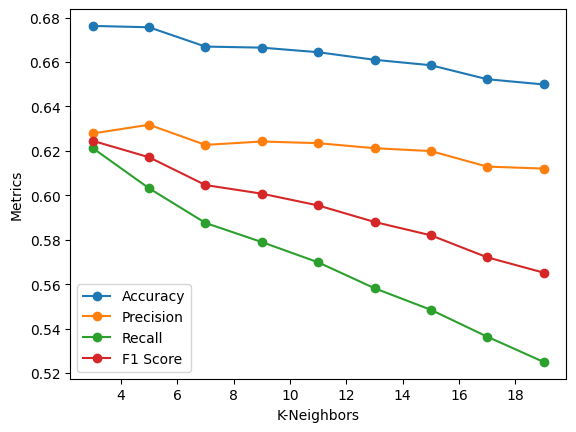

In [222]:
plt.plot(k, accuracy_list, marker="o", label="Accuracy")
plt.plot(k, precision_list, marker="o", label="Precision")
plt.plot(k, recall_list, marker="o", label="Recall")
plt.plot(k, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("K-Neighbors")
plt.ylabel("Metrics")
plt.legend()

In [223]:
best_n = k[np.argmax(accuracy_list)]
best_n

3

## 2.4 - Performance for Test Dataset

In [224]:
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))

# Predict
y_pred_test = knn.predict(X_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.6884486154559147
Test Precision: 0.6480251346499102
Test Recall: 0.6351957765068191
Test F1 Score: 0.6415463230393247


# 3.0 - Save Results

In [226]:
train_metrics = {
    "Algorithm": "KNN",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "KNN",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "KNN",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./train_metrics.csv")
pd.DataFrame(validation_metrics, index=[0]).to_csv("./validation_metrics.csv")
pd.DataFrame(test_metrics, index=[0]).to_csv("./test_metrics.csv")